In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Load the dataset
file_path = "car_evaluation.csv"  # Update with your file path
data = pd.read_csv(file_path, header=None)

# Assign column names if not provided in the dataset
data.columns = ['Buying', 'Maint', 'Doors', 'Persons', 'Lug_boot', 'Safety', 'Class']


In [3]:
# Preview the data
print(data.head())

# Check for null values
print(data.isnull().sum())

# Summary of the dataset
print(data.describe())
print(data['Class'].value_counts())  # Distribution of target classes


  Buying  Maint Doors Persons Lug_boot Safety  Class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc
Buying      0
Maint       0
Doors       0
Persons     0
Lug_boot    0
Safety      0
Class       0
dtype: int64
       Buying  Maint Doors Persons Lug_boot Safety  Class
count    1728   1728  1728    1728     1728   1728   1728
unique      4      4     4       3        3      3      4
top     vhigh  vhigh     2       2    small    low  unacc
freq      432    432   432     576      576    576   1210
Class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [4]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
encoder = LabelEncoder()
for col in data.columns:
    data[col] = encoder.fit_transform(data[col])

# Separate features and target variable
X = data.drop('Class', axis=1)  # Features
y = data['Class']               # Target


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Create the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [7]:
# Predict on test data
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 97.40%
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94        83
           1       0.65      1.00      0.79        11
           2       0.99      1.00      1.00       235
           3       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.91      0.96      0.92       346
weighted avg       0.98      0.97      0.98       346

Confusion Matrix:
[[ 75   6   2   0]
 [  0  11   0   0]
 [  0   0 235   0]
 [  1   0   0  16]]


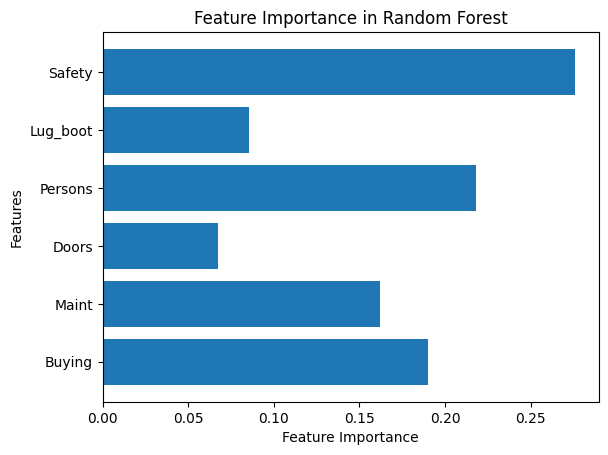

In [8]:
import matplotlib.pyplot as plt

# Get feature importance
feature_importance = rf_model.feature_importances_

# Plot feature importance
plt.barh(X.columns, feature_importance)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest")
plt.show()


In [9]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.9703186312980693
